In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import mglearn
import matplotlib.pyplot as plt
plt.rcParams['font.family']='Malgun Gothic'
plt.rcParams['axes.unicode_minus']= False

# K-Means

In [9]:
x, y = make_blobs(random_state=1)

In [10]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

KMeans(n_clusters=3)

In [11]:
print(kmeans.predict(x))

[1 2 2 2 0 0 0 2 1 1 2 2 0 1 0 0 0 1 2 2 0 2 0 1 2 0 0 1 1 0 1 1 0 1 2 0 2
 2 2 0 0 2 1 2 2 0 1 1 1 1 2 0 0 0 1 0 2 2 1 1 2 0 0 2 2 0 1 0 1 2 2 2 0 1
 1 2 0 0 1 2 1 2 2 0 1 1 1 1 2 1 0 1 1 2 2 0 0 1 0 1]


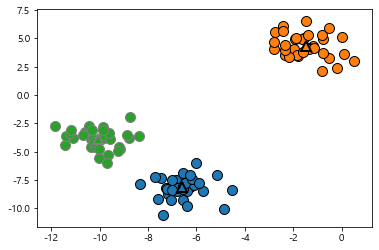

In [12]:
mglearn.discrete_scatter(x[:,0], x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                           kmeans.cluster_centers_[:,1],[0,1,2],
                           markers='^', markeredgewidth=2)
plt.show()                         

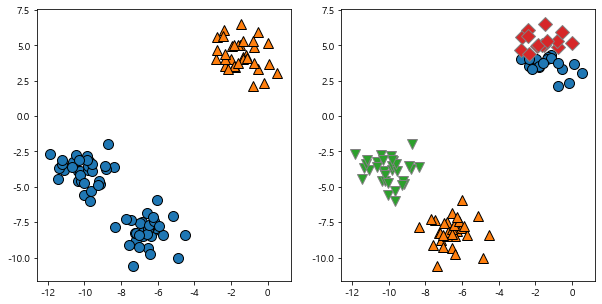

In [16]:
fig, axes = plt.subplots(1,2, figsize=(10,5))

#2개
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[0])

# 4개
kmeans = KMeans(n_clusters=4)
kmeans.fit(x)
a = kmeans.labels_

mglearn.discrete_scatter(x[:,0], x[:,1], a, ax=axes[1])
plt.show()

## k-means 실패 사례

In [18]:
x, y = make_blobs(n_samples=200,
                 cluster_std=[1.0, 2.5, 0.5],
                 random_state=170)

In [19]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x)

pred = kmeans.predict(x)

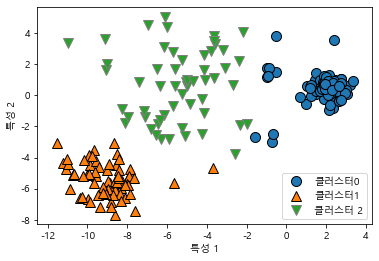

In [22]:
mglearn.discrete_scatter(x[:,0],x[:,1], pred)
plt.legend(['클러스터0','클러스터1','클러스터 2'], loc='best')
plt.xlabel('특성 1')
plt.ylabel('특성 2')
plt.show()

### 실패사례2

In [25]:
x,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

# 데이터가 길게 늘어지도록 변경
transformation = rng.normal(size=(2,2))
x = np.dot(x,transformation)

#KMeans
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)
pred = kmeans.predict(x)

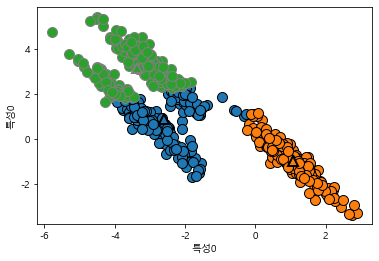

In [29]:
mglearn.discrete_scatter(x[:,0],x[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0],
                         kmeans.cluster_centers_[:,1],[0,1,2],
                         markers='^', markeredgewidth=2)
plt.xlabel('특성0')
plt.ylabel('특성0')
plt.show()

#### 실패사례3

In [32]:
from sklearn.datasets import make_moons
x,y = make_moons(n_samples=200, noise =0.05, random_state=0)

In [35]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(x)
pred = kmeans.predict(x)

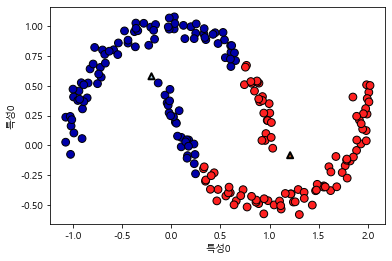

In [39]:
plt.scatter(x[:,0],x[:,1],c=pred, cmap=mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
           marker ='^', c=range(kmeans.n_clusters), linewidth=2, cmap='Paired',
           edgecolors='k')

plt.xlabel('특성0')
plt.ylabel('특성0')
plt.show()